In [135]:
import numpy as np
import os
import matplotlib.pyplot as plt

import pandas as pd

from glidar_parse import sci_track
from glidar_parse.kml_parser import KmlParser
from glidar_parse.imet_parser import iMetParser

from scipy.ndimage import gaussian_filter1d

In [136]:
file = os.path.abspath('../data/single-flight/2019-Bavallen628175.kml')
parser = KmlParser(file)
track = sci_track.SciTrack(parser).track


file2 = os.path.abspath('../data/iMet/20210821-214229-00044507.txt')
track2 = sci_track.SciTrack(iMetParser(file2)).track

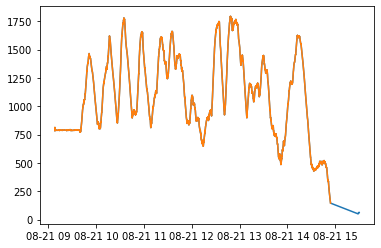

In [139]:

plt.plot(track2.time, track2.altitude)
track2 = track2[track2.time<'2021-08-21 15:10:00']
plt.plot(track2.time, track2.altitude)

In [140]:
i = track2[track2.vario > 1.5].index[0]

subtrack2 = track2.copy().loc[i:i+100]
subtrack = track.copy().loc[1000:1100]

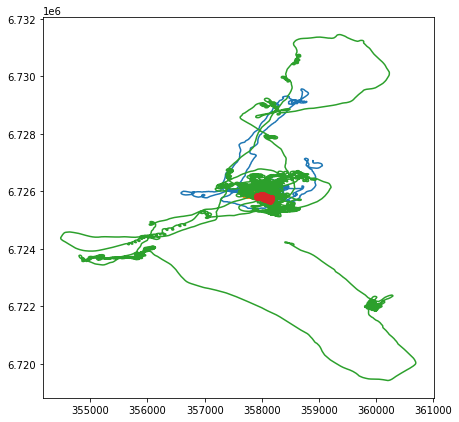

In [141]:
plt.figure(figsize=(7,7))
plt.plot(track.x, track.y)
plt.plot(subtrack.x, subtrack.y, 'o')

plt.plot(track2.x, track2.y)
plt.plot(subtrack2.x, subtrack2.y, 'o')

plt.show()

In [142]:
subtrack

,time,longitude,latitude,altitude,x,y,dt,vario,dx,dy,course
1000,2019-04-14 11:21:41,6.405283,60.643417,1099.0,358117.355326,6.725871e+06,2.0,1.355645,-4.484741,-8.976417,-2.034135
1001,2019-04-14 11:21:42,6.405183,60.643333,1101.0,358111.519780,6.725862e+06,2.0,1.235405,-5.419093,-8.522113,-2.137186
1002,2019-04-14 11:21:43,6.405100,60.643267,1101.0,358106.692614,6.725855e+06,2.0,1.126485,-6.298363,-7.879785,-2.245114
1003,2019-04-14 11:21:44,6.405017,60.643183,1101.0,358101.786277,6.725846e+06,2.0,1.035740,-7.136341,-7.043849,-2.362717
1004,2019-04-14 11:21:45,6.404900,60.643100,1101.0,358095.025790,6.725837e+06,2.0,0.968978,-7.913373,-6.004677,-2.492483
...,...,...,...,...,...,...,...,...,...,...,...
1096,2019-04-14 11:23:17,6.398017,60.643950,1287.0,357722.532405,6.725946e+06,2.0,1.934195,1.180310,-5.081525,-1.342569
1097,2019-04-14 11:23:18,6.398050,60.643900,1290.0,357724.115755,6.725941e+06,2.0,1.939045,0.133968,-5.727881,-1.547412
1098,2019-04-14 11:23:19,6.398050,60.643833,1293.0,357723.820341,6.725933e+06,2.0,1.937174,-1.037588,-6.088955,-1.739580
1099,2019-04-14 11:23:20,6.398033,60.643767,1296.0,357722.600096,6.725926e+06,2.0,1.923637,-2.300182,-6.170635,-1.927604


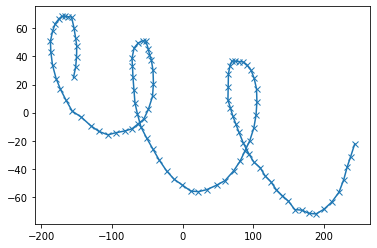

In [143]:
subtrack['x'] -= subtrack.x.mean()
subtrack['y'] -= subtrack.y.mean()


plt.plot(subtrack.x, subtrack.y, 'x-')
plt.show()

Diameter of the thermalling turn: 99.8746492145583


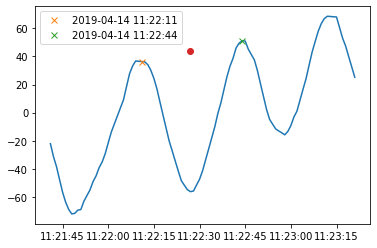

In [144]:
plt.plot(subtrack.time, subtrack.y)
plt.plot(subtrack.iloc[30].time, subtrack.iloc[30].y, 'x', label=f'{subtrack.iloc[30].time}')
plt.plot(subtrack.iloc[63].time, subtrack.iloc[63].y, 'x', label=f'{subtrack.iloc[63].time}')
plt.legend()

ip = subtrack.iloc[30].y  - (subtrack.iloc[30].y - subtrack.iloc[63].y) * 0.5
plt.plot(subtrack.iloc[46].time, ip, 'o')

print('Diameter of the thermalling turn:', ip - subtrack.iloc[46].y)
